##  1.. Data Collection !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import os

In [4]:
filepath=r"C:\Users\aksha\Downloads\S&P_resources\individual_stocks_5yr"

In [5]:
files=os.listdir(filepath)

In [6]:
df_list=[]

In [7]:
for file in files:
    if file.endswith('.csv'):
        file_path=os.path.join(filepath,file)
        df=pd.read_csv(file_path)
        df_list.append(df)

In [8]:
final_df=pd.concat(df_list,ignore_index=True)

In [9]:
final_df #Store all companys data

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [10]:
com_list=['AAPL','MSFT','GOOG','AMZN'] #Stored list of only those company on which we want perform analysis

In [13]:
filterd_df=final_df[final_df["Name"].isin(com_list)].reset_index().drop(columns=["index"]) #Extract filter dataframe

In [14]:
filterd_df

date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
4747  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]

In [15]:
filterd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [19]:
filterd_df["date"]=pd.to_datetime(filterd_df["date"]) #Change the datatype of 'date' column

In [20]:
unique_company=list(filterd_df["Name"].unique())

##  2.. Analysing change in price of the stock overtime !

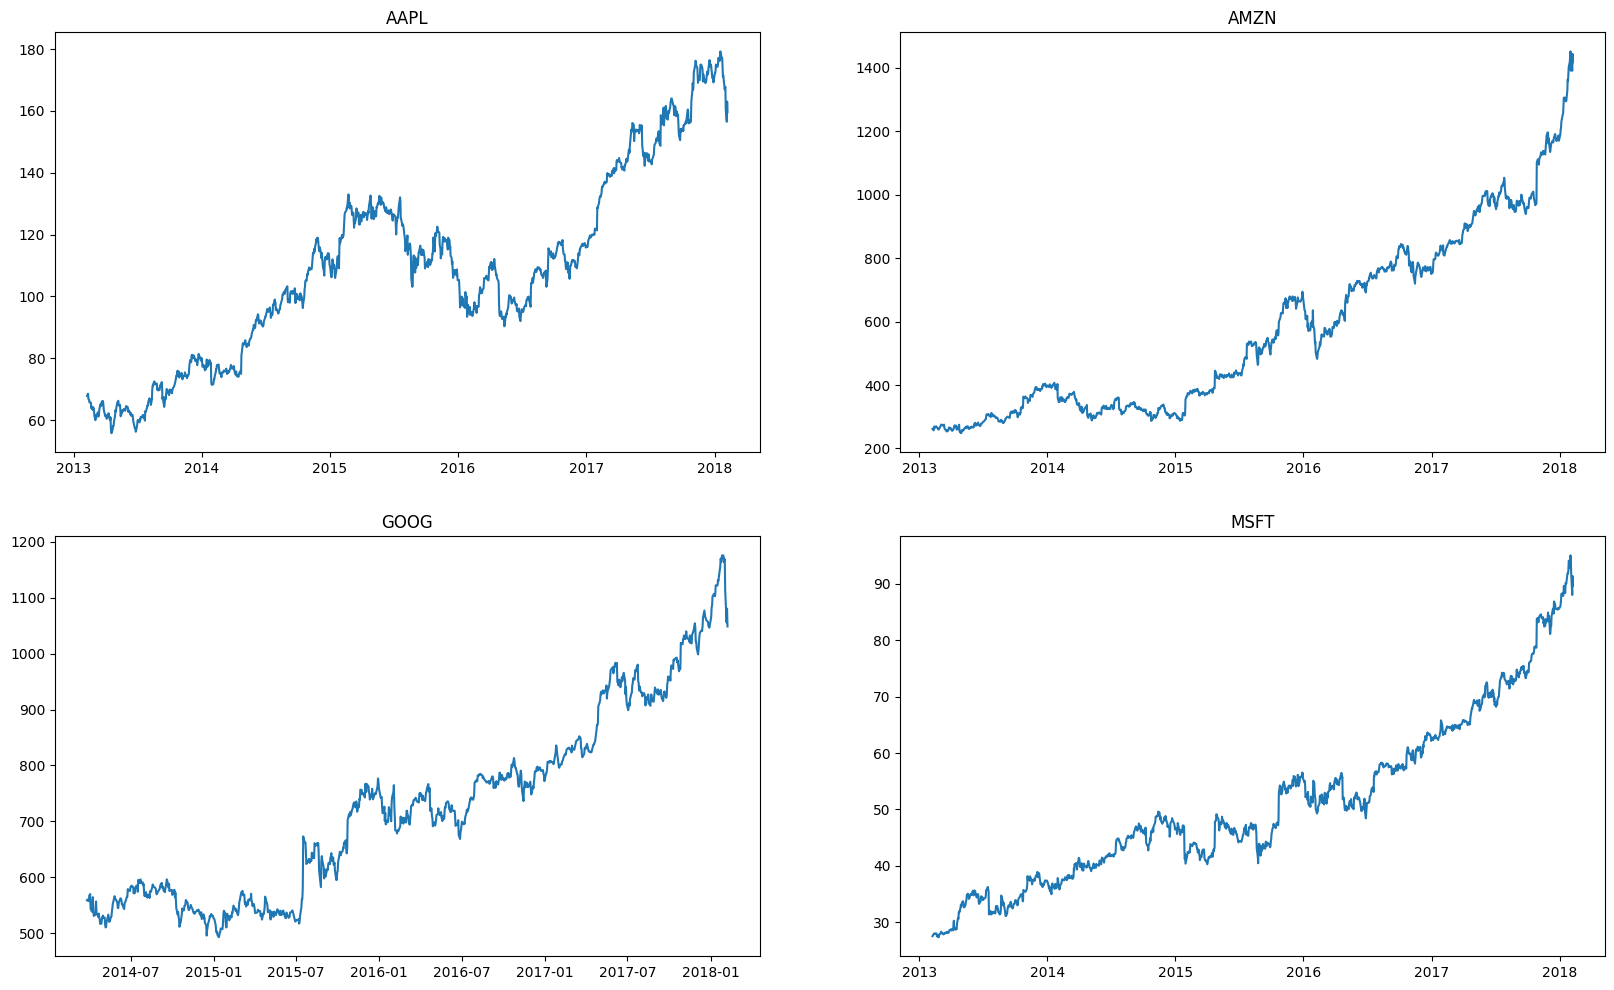

In [21]:
plt.figure(figsize=(20,12))
for index,company in enumerate(unique_company,1):
    plt.subplot(2,2,index)
    filter1=filterd_df["Name"]==company
    df1=filterd_df[filter1]
    plt.plot(df1["date"],df1["close"])
    plt.title(company)
    

## Analyzing Moving Average of the various stocks

In [16]:
filterd_df["close"].rolling(window=10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4747    92.765
4748    92.943
4749    92.582
4750    92.525
4751    92.304
Name: close, Length: 4752, dtype: float64

In [17]:
new_df=filterd_df.copy()

In [18]:
ma_day=[10,20,50]

In [19]:
for ma in ma_day:
    new_df["close_"+str(ma)]=new_df["close"].rolling(ma).mean()

In [20]:
new_df

date     open     high      low    close     volume  Name  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
...         ...      ...      ...      ...      ...        ...   ...   
4747 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   
4748 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   
4749 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   
4750 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   
4751 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   

      close_10  close_20  close_50  
0          NaN       NaN       NaN  
1          NaN       NaN       NaN  
2          NaN       NaN       NaN  
3          NaN       NaN       NaN  
4          NaN       NaN       NaN  
...        ...       ...       ...  
4747    92.765   90.6770   86.9978  
4748    92.943   90.9105   87.1828  
4749    92.582   90.9010   87.2684  
4750    92.525   91.0535   87.4328  
4751    92.304   91.1230   87.5598  

[4752 rows x 10 columns]

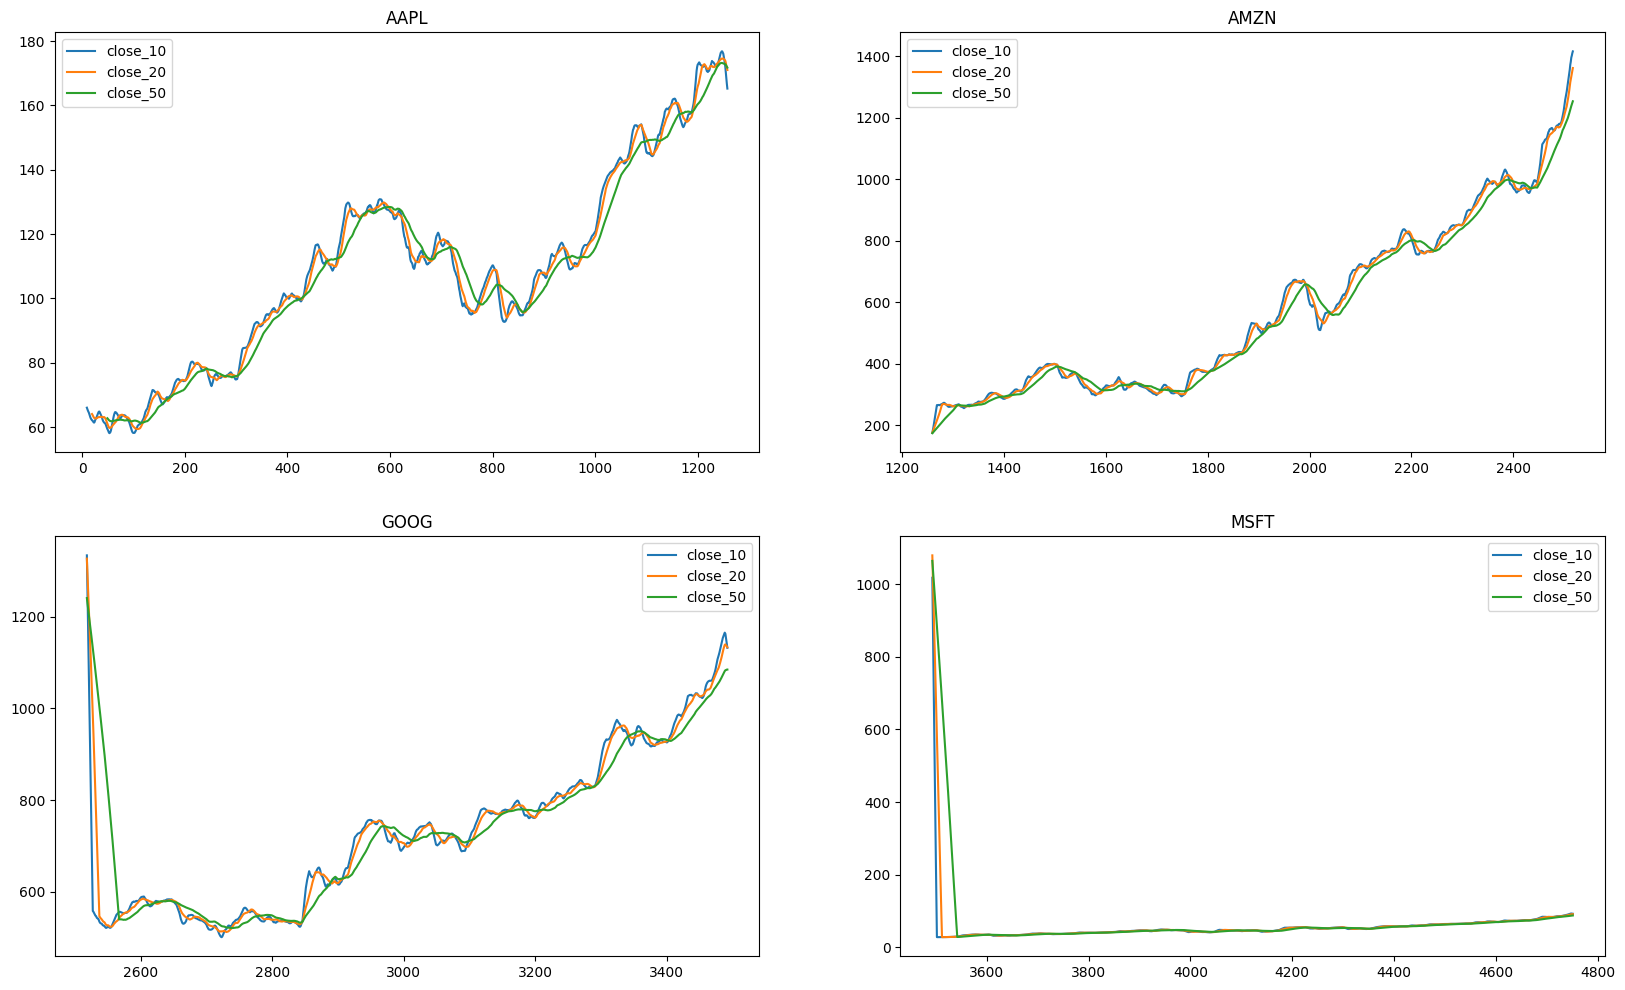

In [21]:
plt.figure(figsize=(20,12))
for index,company in enumerate(unique_company,1):
    plt.subplot(2,2,index)
    filter1=new_df["Name"]==company
    df1=new_df[filter1]
    df1[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)
    

## Observing closing price change in apple stocks

In [22]:
app_com=["AAPL"]

In [23]:
appl_df=final_df[final_df["Name"].isin(app_com)].reset_index().drop(columns=["index"]).reset_index().drop(columns=["index"])

In [24]:
appl_df

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [26]:
appl_df["Daily Return(%)"]=appl_df["close"].pct_change()*100

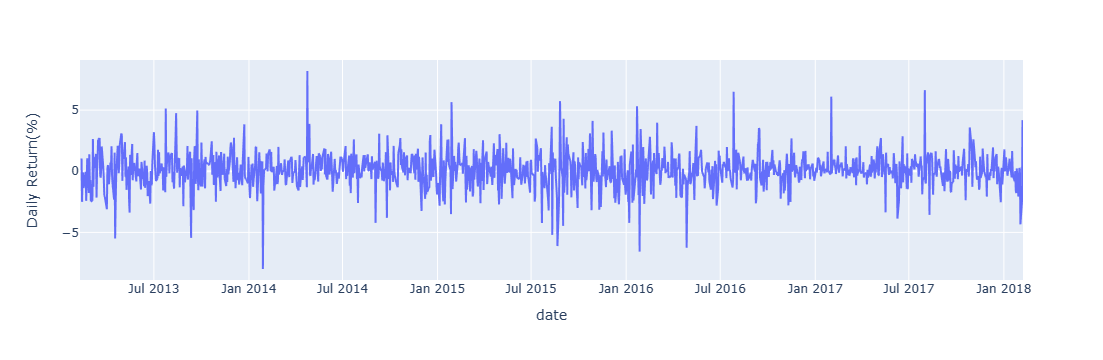

In [27]:
px.line(appl_df,x='date',y='Daily Return(%)')

Performing Resampling Analysis of closing price

In [28]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1259 non-null   object 
 1   open             1259 non-null   float64
 2   high             1259 non-null   float64
 3   low              1259 non-null   float64
 4   close            1259 non-null   float64
 5   volume           1259 non-null   int64  
 6   Name             1259 non-null   object 
 7   Daily Return(%)  1258 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 78.8+ KB


In [29]:
appl_df['date']=pd.to_datetime(appl_df["date"])

In [30]:
appl_df.set_index("date",inplace=True)

In [31]:
appl_df

open      high       low     close     volume  Name  \
date                                                                  
2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...              ...       ...       ...       ...        ...   ...   
2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

            Daily Return(%)  
date                         
2013-02-08              NaN  
2013-02-11         1.042235  
2013-02-12        -2.506658  
2013-02-13        -0.190297  
2013-02-14        -0.089934  
...                     ...  
2018-02-01         0.209043  
2018-02-02        -4.339015  
2018-02-05        -2.498442  
2018-02-06         4.179181  
2018-02-07        -2.140710  

[1259 rows x 7 columns]

<Axes: xlabel='date'>

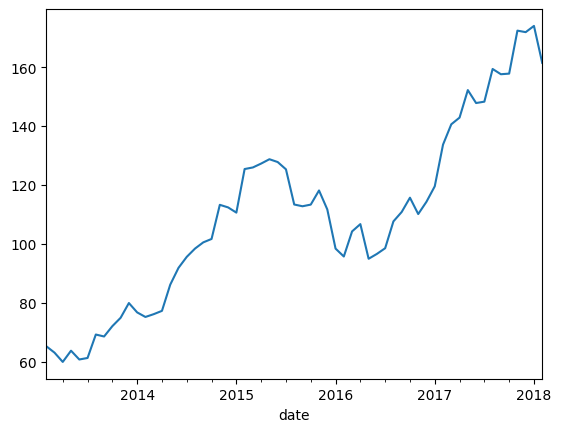

In [32]:
appl_df["close"].resample("M").mean().plot()

<Axes: xlabel='date'>

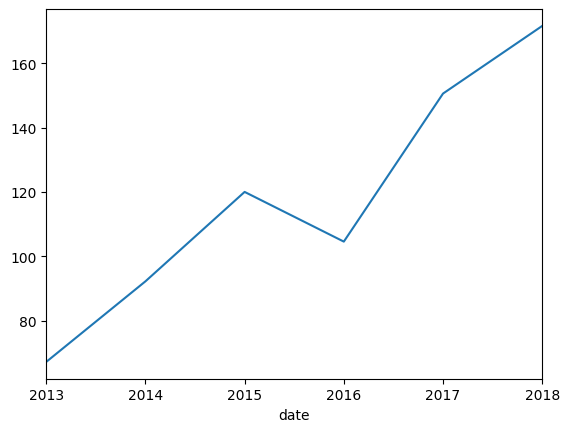

In [33]:
appl_df["close"].resample("Y").mean().plot()

<Axes: xlabel='date'>

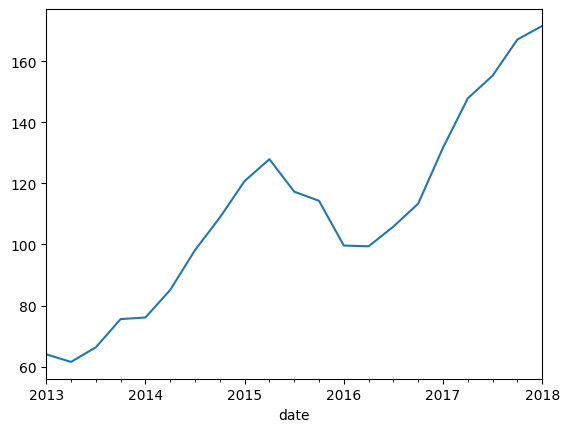

In [34]:
appl_df["close"].resample("Q").mean().plot()

#Perform multivarient Analysis to understand co-relation
checking clossing price of 'apple',microsoft,amazon,google are corelated or not

In [35]:
final_df

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [36]:
com_list

['AAPL', 'MSFT', 'GOOG', 'AMZN']

In [58]:
closing_df=pd.DataFrame()

In [74]:
for cm in com_list:
    fil_df=final_df[final_df["Name"]==cm].reset_index().drop(columns=['index'])
    closing_df[cm+'_close']=fil_df['close']

In [75]:
closing_df

AAPL_close  MSFT_close  GOOG_close  AMZN_close
0        67.8542       27.55      558.46      261.95
1        68.5614       27.86      559.99      257.21
2        66.8428       27.88      556.97      258.70
3        66.7156       28.03      567.16      269.47
4        66.6556       28.04      567.00      269.24
...          ...         ...         ...         ...
1254    167.7800       94.26         NaN     1390.00
1255    160.5000       91.78         NaN     1429.95
1256    156.4900       88.00         NaN     1390.00
1257    163.0300       91.33         NaN     1442.84
1258    159.5400       89.61         NaN     1416.78

[1259 rows x 4 columns]

In [77]:
closing_df.corr()

AAPL_close  MSFT_close  GOOG_close  AMZN_close
AAPL_close    1.000000    0.899689    0.640522    0.819078
MSFT_close    0.899689    1.000000    0.907011    0.955977
GOOG_close    0.640522    0.907011    1.000000    0.888456
AMZN_close    0.819078    0.955977    0.888456    1.000000

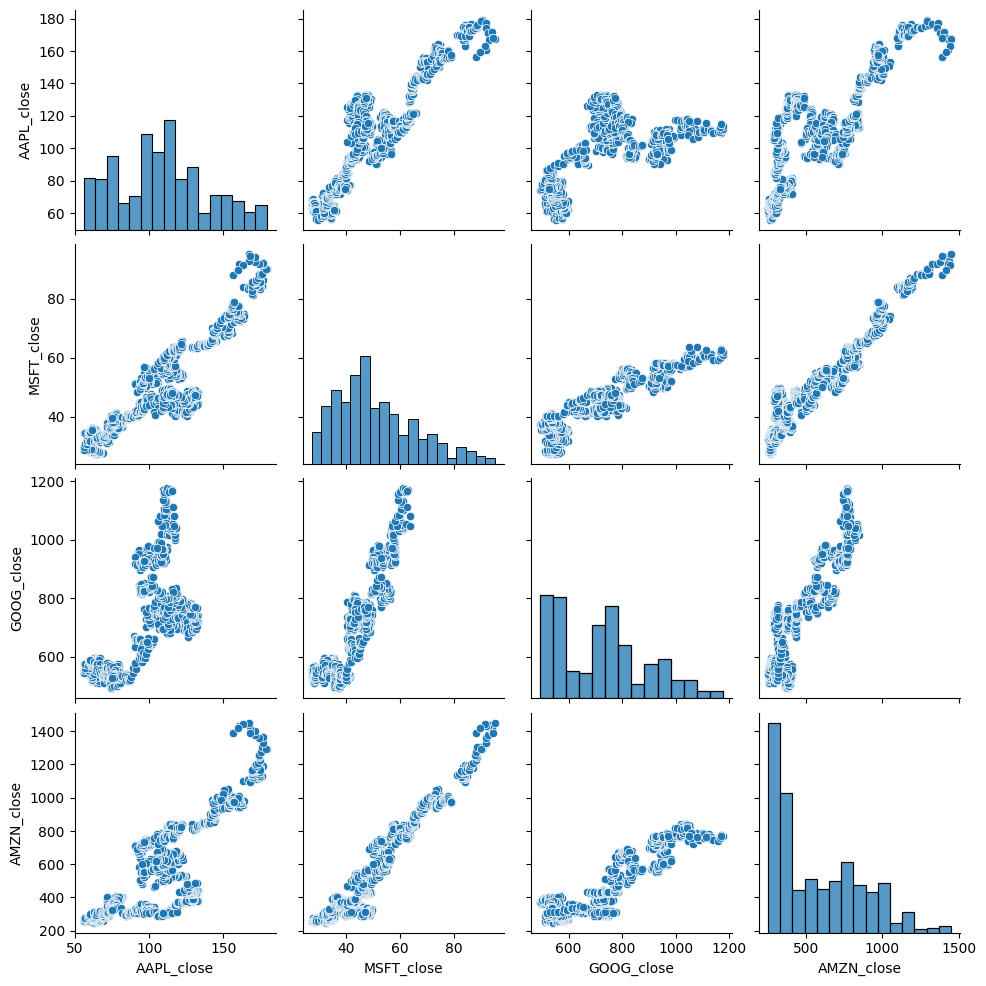

In [76]:
sns.pairplot(closing_df)

<Axes: >

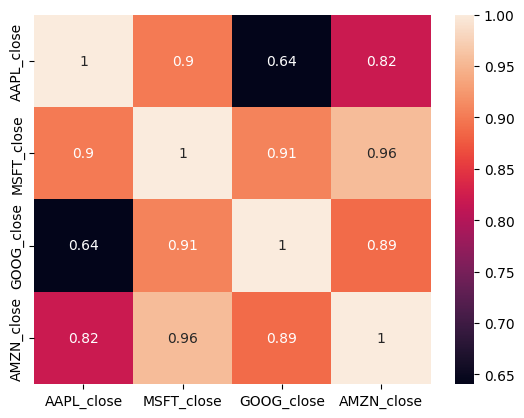

In [80]:
sns.heatmap(closing_df.corr(),annot=True)

Performing co-reletional Analysis

In [86]:
for col in closing_df.columns:
    closing_df[col+"_pct_change"]=((closing_df[col]-closing_df[col].shift(1))/closing_df[col].shift(1))*100

In [88]:
closing_df.columns

Index(['AAPL_close', 'MSFT_close', 'GOOG_close', 'AMZN_close',
       'AAPL_close_pct_change', 'MSFT_close_pct_change',
       'GOOG_close_pct_change', 'AMZN_close_pct_change'],
      dtype='object')

In [89]:
closing_pct_df=closing_df[['AAPL_close_pct_change', 'MSFT_close_pct_change',
       'GOOG_close_pct_change', 'AMZN_close_pct_change']]

In [90]:
closing_pct_df

AAPL_close_pct_change  MSFT_close_pct_change  GOOG_close_pct_change  \
0                       NaN                    NaN                    NaN   
1                  1.042235               1.125227               0.273968   
2                 -2.506658               0.071788              -0.539295   
3                 -0.190297               0.538020               1.829542   
4                 -0.089934               0.035676              -0.028211   
...                     ...                    ...                    ...   
1254               0.209043              -0.789391                    NaN   
1255              -4.339015              -2.631021                    NaN   
1256              -2.498442              -4.118544                    NaN   
1257               4.179181               3.784091                    NaN   
1258              -2.140710              -1.883280                    NaN   

      AMZN_close_pct_change  
0                       NaN  
1                 -1.809506  
2                  0.579293  
3                  4.163123  
4                 -0.085353  
...                     ...  
1254              -4.196734  
1255               2.874101  
1256              -2.793804  
1257               3.801439  
1258              -1.806160  

[1259 rows x 4 columns]

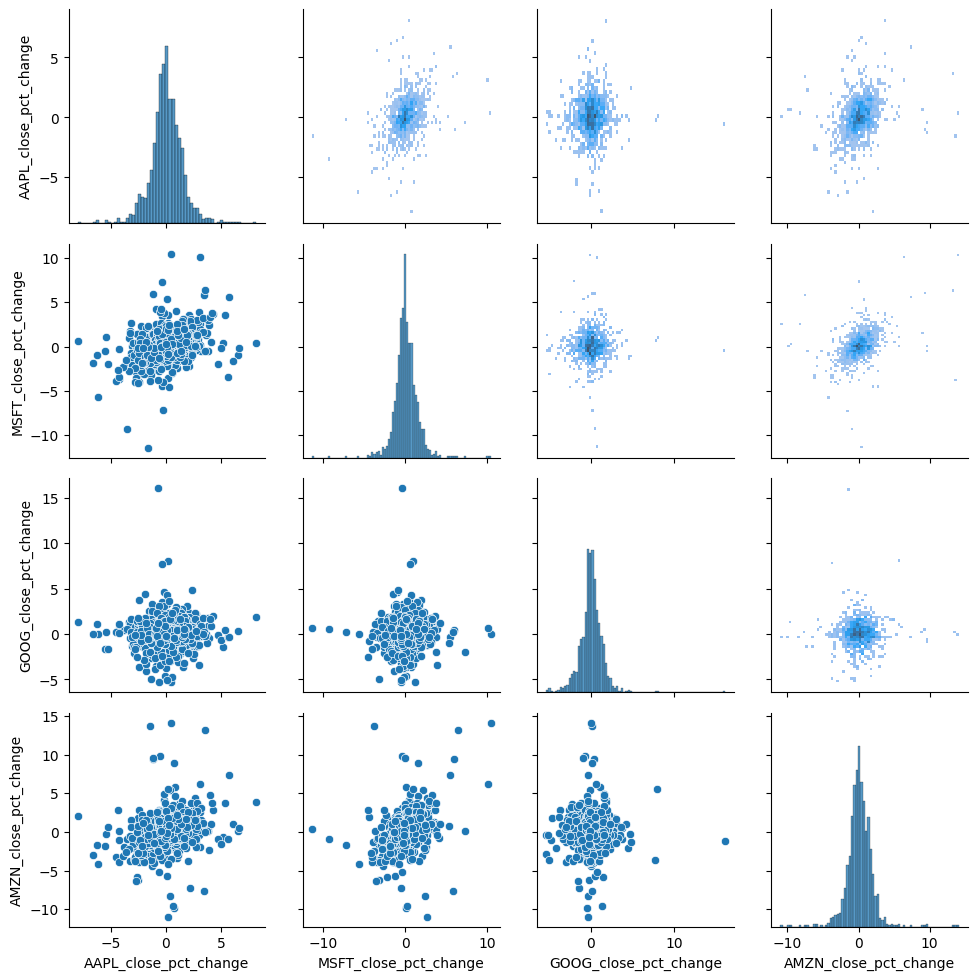

In [96]:
g=sns.PairGrid(data=closing_pct_df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.histplot)

In [97]:
closing_pct_df.corr()

AAPL_close_pct_change  MSFT_close_pct_change  \
AAPL_close_pct_change               1.000000               0.366598   
MSFT_close_pct_change               0.366598               1.000000   
GOOG_close_pct_change               0.036202               0.038939   
AMZN_close_pct_change               0.287659               0.402678   

                       GOOG_close_pct_change  AMZN_close_pct_change  
AAPL_close_pct_change               0.036202               0.287659  
MSFT_close_pct_change               0.038939               0.402678  
GOOG_close_pct_change               1.000000               0.027698  
AMZN_close_pct_change               0.027698               1.000000